# STAT207 Final Project - Gym Member Exercise Analysis

Abby Rogus

In [4]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
import numpy as np
sns.set() 
import statsmodels.formula.api as smf


## 1. Introduction

In this project I will build a predictive model that predicts gender during a workout session using the data collected. I will create a predictive model that effectively predicts gender, considering at least five explanatory variables such as Age, Workout_Type, BMI, Fat_Percentage, and Avg_BPM. This model may be useful for gym members/ personal trainers needing to tailor their exercise routines to fit a specific caloric number. Additionally, those who track their calories may benefit from understanding the various factors that impact calories burned during a workout.

I believe people like personal trainers and gym owners should prefer equally high accuracy for both “positives” and “negatives”, which in this research, is to predict whether the person is male or female. Equal accuracy ensures neither gender is systematically overlooked or misrepresented. A model that performs equally well on both classes is more likely to generalize to new data. I found from the National Library of Medicine that gender does play a role in workout routines. For example, “Women are at higher risk  for cardiovascular disease, diabetes, hypertension, colon cancer, and depression” (Segar, Jayaratne, Hanlin, Richardson, 2002). By catering workouts for women it can help decrease these things specifically. Moreover, I found more support on how gender impacts the amount of calories burned in a workout. From Everyday Health, author Byrne, in 2023, states “Males generally burn 5 to 10 percent more calories than females at rest, and this percentage usually increases with exercise” (Byrne, 2023). This explains that workouts catered to gender will benefit since females and males are burning calories at different rates. 



### Primary research goal: 
Build a predictive model that will effectively predict Gender for new datasets
### Secondary Goal: 
Ideally, the model that I select would also be interpretable. 


## 2. Dataset Discussion

I was looking through the website Kaggle and searched through datasets that were related to exercise/fitness and found this dataset. The link to this data set is https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset. I downloaded this data set on April 22nd, 2025 into the final project folder. Once I imported the dataset, it had 15 numerical and categorical columns, and had 973 rows that represented each individual gym goer (does not state what gym). The source does not state how the data was collected. This dataset assumes a binary classification, which is female and male, excluding: Non-binary, transgender, or gender-nonconforming individuals. Disabled individuals (workout types may not account for adaptive fitness) possibly also weren't included in this dataset. 


In [5]:
df  = pd.read_csv("gym_members_exercise_tracking.csv")
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


In [6]:
df.shape[0]

973

* There are 973 rows in this dataset. 

* I select Age, Workout_Type, BMI, Fat_Percentage, and Avg_BPM to be our explanatory variables. Workout_type is a categorical variable and others are numerical variables. We belive that these 5 explanatory variables are the one that are most relevant to Gender, and the model outcome should benefit personal trainers and other individauls who use our porject out come the most. 

## 3. Dataset Cleaning

* Based on the code we ran we did not have any implicit missing values. 
* With our categorical variable, each level had more than a few observations, so we did not need to remove any and worry about this leading to an issue of overfitting. 
* We graphed our explanatory variables to see if there were any outliers. 
* The cons about dropping the outliers, is that this is data that was collected and can be important for finding out crucial information from this dataset. On the contrary, the pros of dropping the outliers is that they may skew the data. There also may have been an issue when collecting that data and it actually is not very important for us to answer our research question… (need to include more on outliers)
* When answering following questions, we did not notice any aditional data cleaning needed. 


In [7]:
df = df[["Gender","Age","Workout_Type","BMI","Fat_Percentage","Avg_BPM"]]


In [8]:
df.dtypes

Gender             object
Age                 int64
Workout_Type       object
BMI               float64
Fat_Percentage    float64
Avg_BPM             int64
dtype: object

In [9]:
np.sort(df["Gender"].unique())

array(['Female', 'Male'], dtype=object)

In [10]:
np.sort(df["Age"].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

In [11]:
np.sort(df["Workout_Type"].unique())

array(['Cardio', 'HIIT', 'Strength', 'Yoga'], dtype=object)

In [12]:
np.sort(df["BMI"].unique())

array([12.32, 12.47, 12.67, 12.73, 12.85, 12.91, 12.97, 13.03, 13.23,
       13.36, 13.38, 13.51, 13.71, 13.78, 13.81, 13.82, 13.88, 13.95,
       13.98, 14.07, 14.1 , 14.3 , 14.36, 14.39, 14.54, 14.57, 14.59,
       14.6 , 14.61, 14.69, 14.74, 14.78, 14.85, 14.87, 14.88, 14.93,
       15.02, 15.07, 15.08, 15.14, 15.23, 15.24, 15.31, 15.42, 15.43,
       15.46, 15.49, 15.5 , 15.51, 15.59, 15.61, 15.65, 15.7 , 15.72,
       15.73, 15.75, 15.8 , 15.88, 15.9 , 15.92, 16.01, 16.04, 16.09,
       16.14, 16.19, 16.2 , 16.22, 16.23, 16.25, 16.27, 16.28, 16.35,
       16.41, 16.42, 16.48, 16.5 , 16.52, 16.53, 16.54, 16.56, 16.66,
       16.76, 16.78, 16.8 , 16.86, 16.97, 16.99, 17.01, 17.03, 17.05,
       17.06, 17.11, 17.16, 17.2 , 17.25, 17.27, 17.3 , 17.32, 17.33,
       17.39, 17.4 , 17.44, 17.46, 17.47, 17.51, 17.54, 17.57, 17.59,
       17.6 , 17.61, 17.63, 17.65, 17.7 , 17.72, 17.75, 17.77, 17.82,
       17.83, 17.85, 17.88, 17.89, 17.91, 17.92, 17.93, 17.94, 18.07,
       18.09, 18.1 ,

In [13]:
np.sort(df["Fat_Percentage"].unique())

array([10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.9, 11. , 11.1,
       11.2, 11.3, 11.4, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.4,
       12.5, 12.6, 12.7, 12.8, 12.9, 13.1, 13.2, 13.3, 13.5, 13.6, 13.7,
       13.8, 13.9, 14. , 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.9, 15. ,
       15.1, 15.2, 15.3, 15.5, 15.6, 15.7, 15.8, 15.9, 16.1, 16.2, 16.4,
       16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.5, 17.6,
       17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7,
       18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8,
       19.9, 20. , 20.1, 20.2, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. ,
       21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1,
       22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2,
       23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3,
       24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4,
       25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26

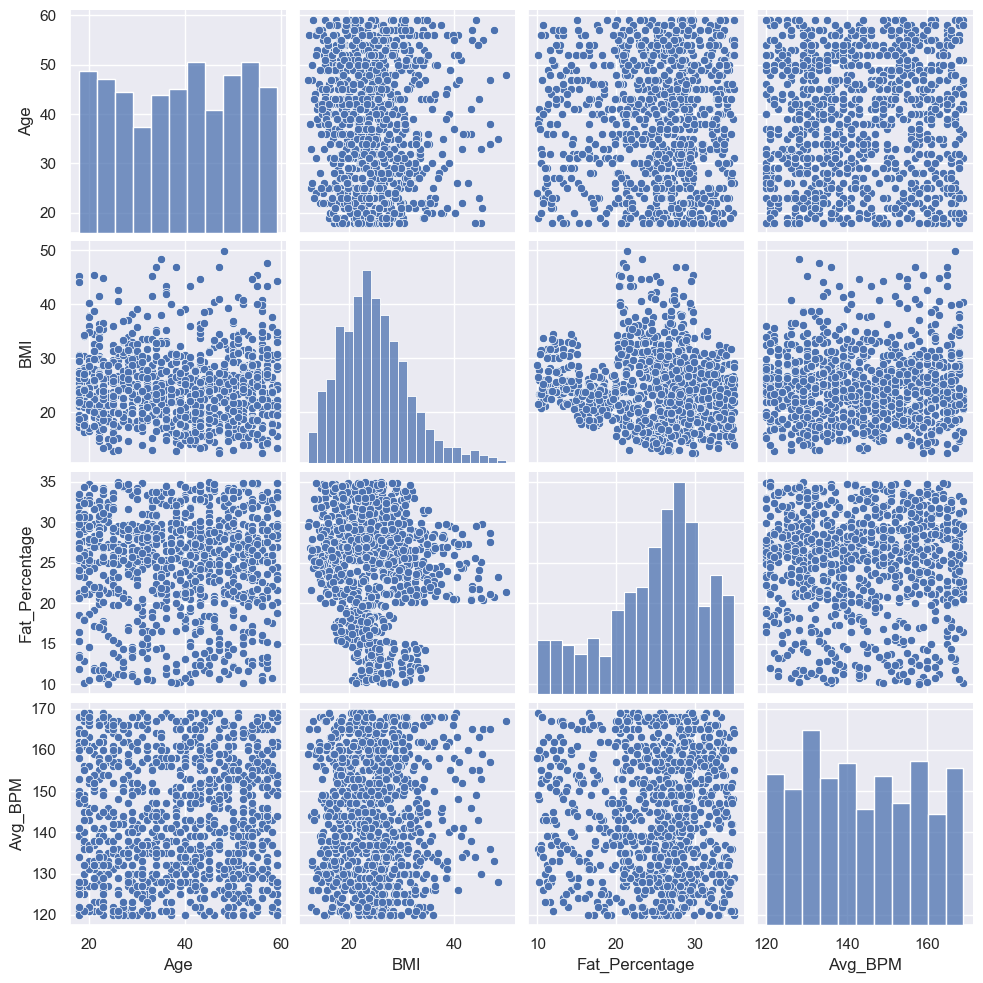

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
df

,Gender,Age,Workout_Type,BMI,Fat_Percentage,Avg_BPM
0,Male,56,Yoga,30.20,12.6,157
1,Female,46,HIIT,32.00,33.9,151
2,Female,32,Cardio,24.71,33.4,122
3,Male,25,Strength,18.41,28.8,164
4,Male,38,Strength,14.39,29.2,158
...,...,...,...,...,...,...
968,Male,24,Strength,28.77,10.0,158
969,Male,25,Strength,25.69,25.0,166
970,Female,59,Cardio,19.50,18.8,120
971,Male,32,HIIT,37.74,28.2,146


In [16]:
df['Gender'] = df['Gender']. replace({'Male': 1, 'Female': 0})
df.head()

/var/folders/_h/zd0lbd_n62s_s6gbls_jj0km0000gp/T/ipykernel_65595/318293353.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender']. replace({'Male': 1, 'Female': 0})


,Gender,Age,Workout_Type,BMI,Fat_Percentage,Avg_BPM
0,1,56,Yoga,30.20,12.6,157
1,0,46,HIIT,32.00,33.9,151
2,0,32,Cardio,24.71,33.4,122
3,1,25,Strength,18.41,28.8,164
4,1,38,Strength,14.39,29.2,158


In [17]:
df

,Gender,Age,Workout_Type,BMI,Fat_Percentage,Avg_BPM
0,1,56,Yoga,30.20,12.6,157
1,0,46,HIIT,32.00,33.9,151
2,0,32,Cardio,24.71,33.4,122
3,1,25,Strength,18.41,28.8,164
4,1,38,Strength,14.39,29.2,158
...,...,...,...,...,...,...
968,1,24,Strength,28.77,10.0,158
969,1,25,Strength,25.69,25.0,166
970,0,59,Cardio,19.50,18.8,120
971,1,32,HIIT,37.74,28.2,146


## 4. Preliminary Analysis

After looking at our visualizations I was able to see which explanatory variables had strong and weak relationships. For starters, Workout Type does not have a strong relationship with gender because based on the graph we see that the bar heights are pretty similar assuming there is not much of an association. The other weak relationships with our response variable were Gender vs Age and Gender vs Average BPM because based on the boxplots, the IQR boxes aligned and did not have much difference meaning there is not much of an association. For the relationship between explanatory variables, there were not any strong relationships meaning there should be no issues with multicollinearity. Lastly, I made visualizations for every pair in our dataset and saw that Gender vs BMI and Gender vs Fat Percentage has decently strong relationships. These interactions may impact the predicted response variable, but can also help answer the research question.


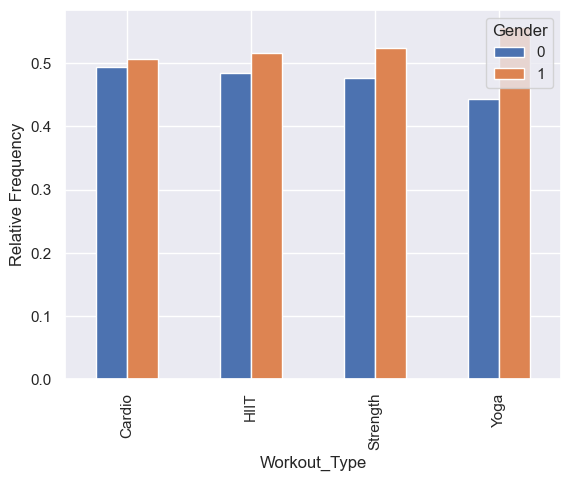

In [18]:
temp = pd.crosstab(df['Workout_Type'],df['Gender'],
                   normalize = 'index')
temp.plot.bar()
plt.ylabel("Relative Frequency")
plt.show()

In [19]:
df

,Gender,Age,Workout_Type,BMI,Fat_Percentage,Avg_BPM
0,1,56,Yoga,30.20,12.6,157
1,0,46,HIIT,32.00,33.9,151
2,0,32,Cardio,24.71,33.4,122
3,1,25,Strength,18.41,28.8,164
4,1,38,Strength,14.39,29.2,158
...,...,...,...,...,...,...
968,1,24,Strength,28.77,10.0,158
969,1,25,Strength,25.69,25.0,166
970,0,59,Cardio,19.50,18.8,120
971,1,32,HIIT,37.74,28.2,146


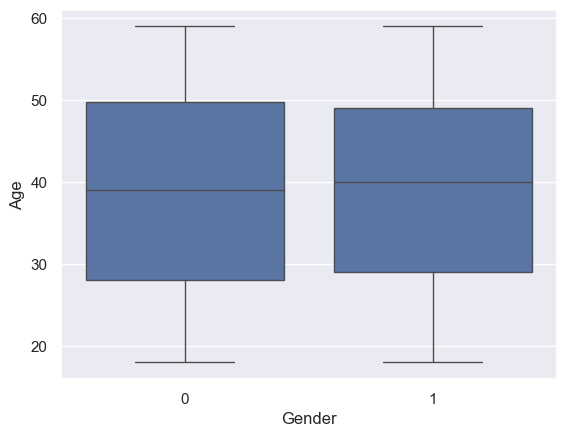

In [20]:
sns.boxplot(x= "Gender", y = 'Age', data = df)
plt.show()

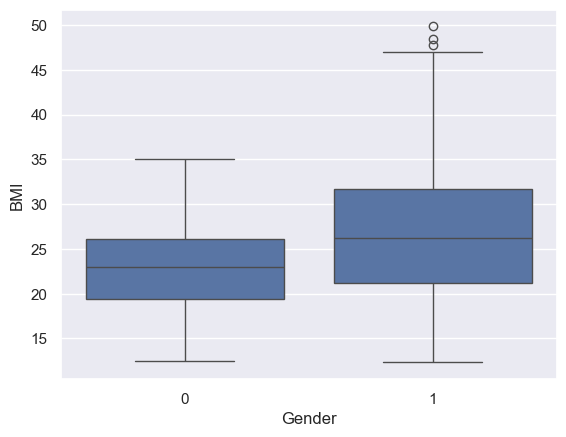

In [21]:
sns.boxplot(x= "Gender", y = 'BMI', data = df)
plt.show()

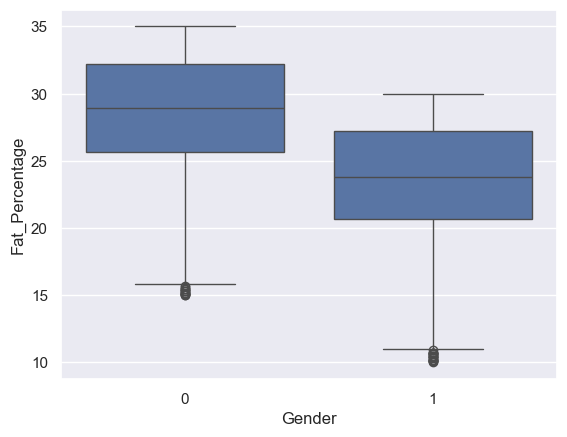

In [22]:
sns.boxplot(x= "Gender", y = 'Fat_Percentage', data = df)
plt.show()

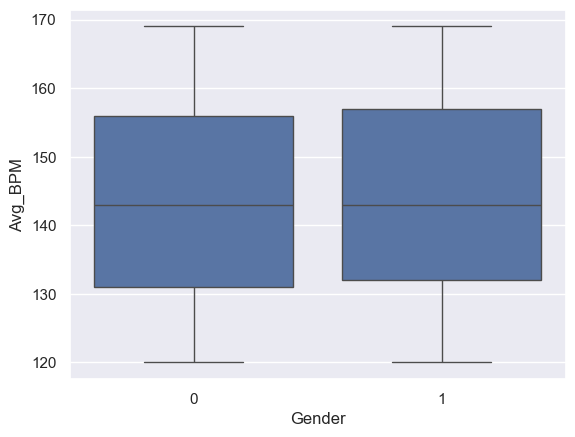

In [23]:
sns.boxplot(x= "Gender", y = 'Avg_BPM', data = df)
plt.show()

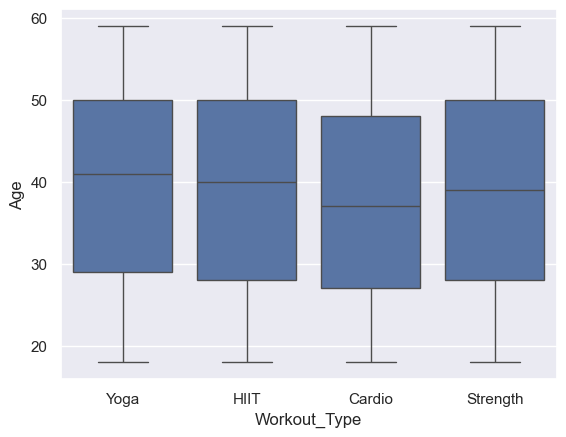

In [24]:
sns.boxplot(x= "Workout_Type", y = 'Age', data = df)
plt.show()

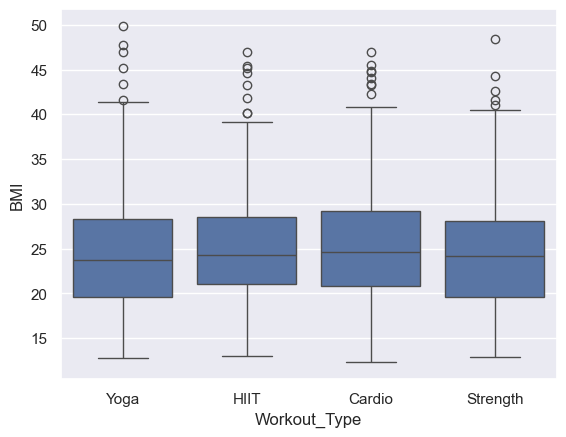

In [25]:
sns.boxplot(x= "Workout_Type", y = 'BMI', data = df)
plt.show()

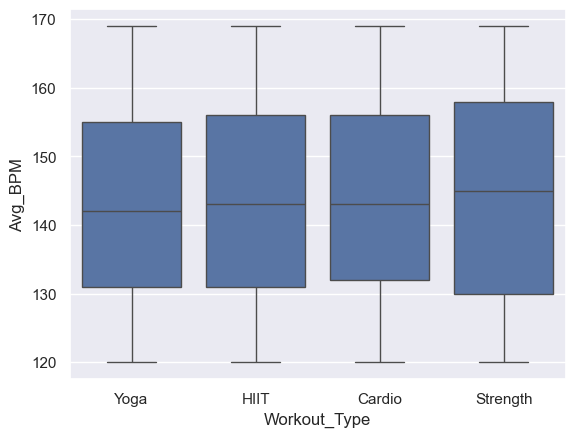

In [26]:
sns.boxplot(x= "Workout_Type", y = 'Avg_BPM', data = df)
plt.show()


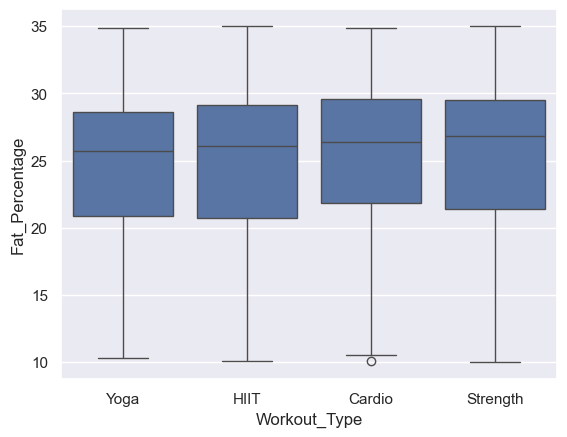

In [27]:
sns.boxplot(x= "Workout_Type", y = 'Fat_Percentage', data = df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

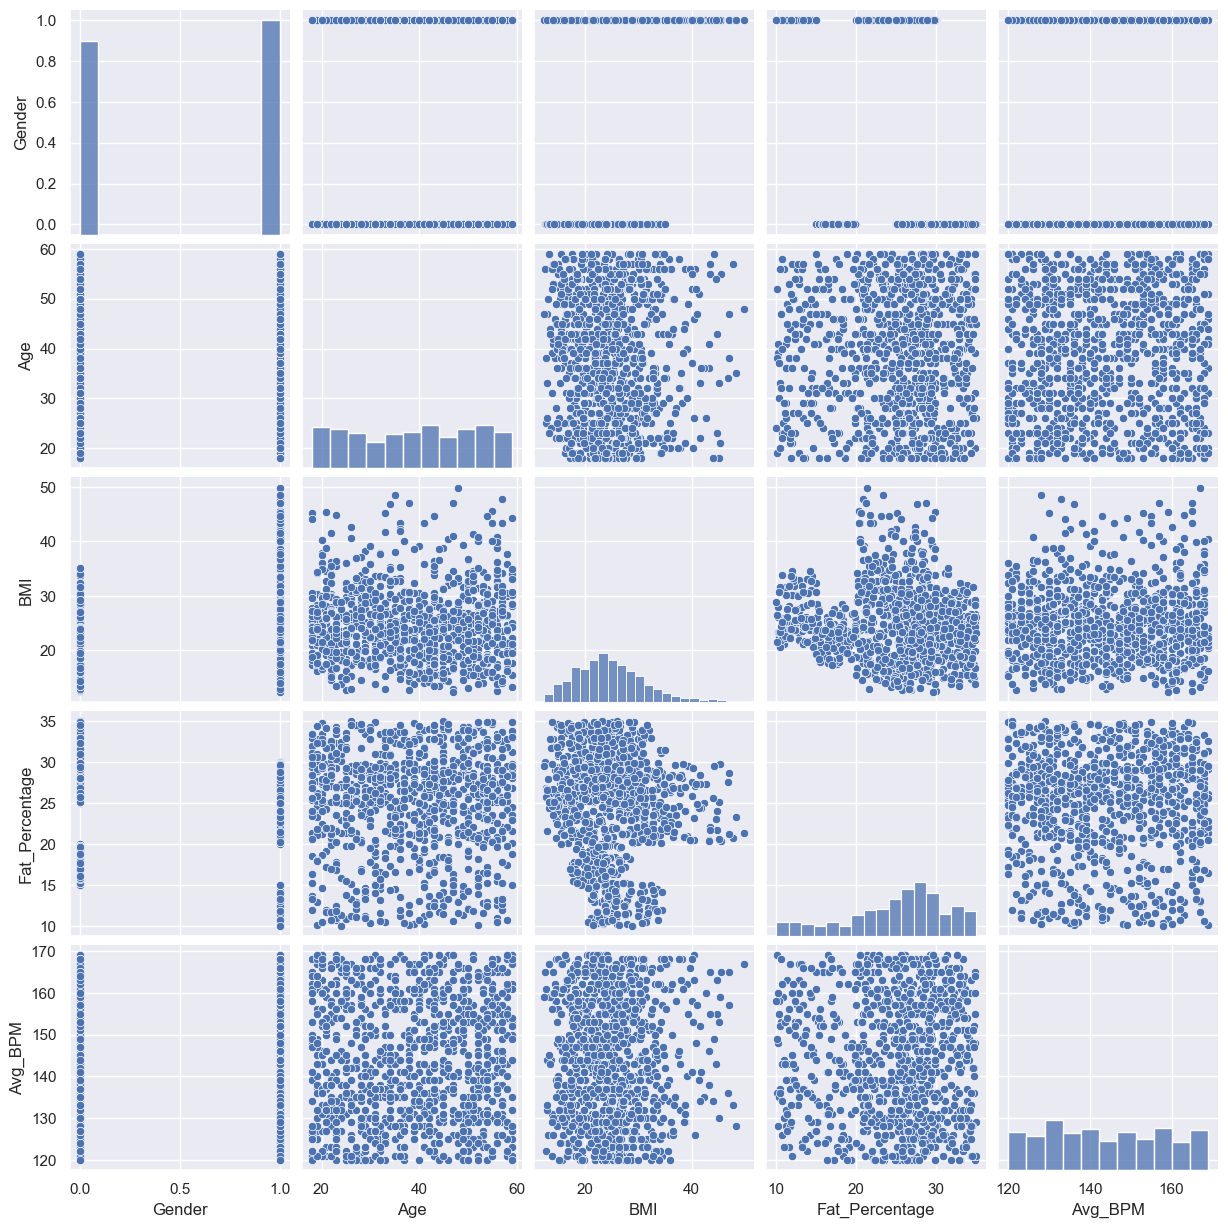

In [28]:
sns.pairplot(df)
plt.show

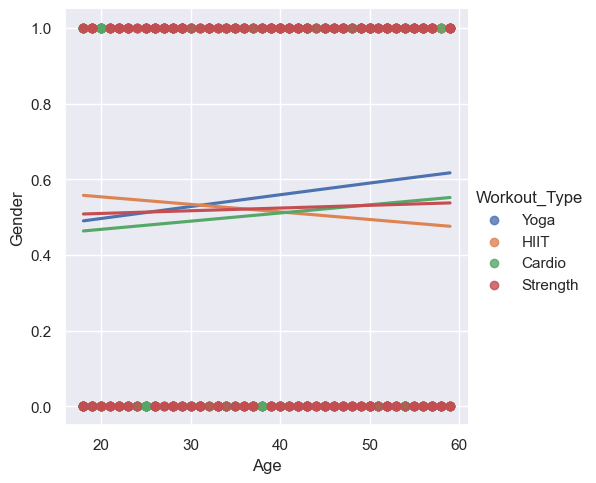

In [29]:
sns.lmplot(x = "Age", y = "Gender", hue = "Workout_Type", data = df, logistic = True, ci = False)

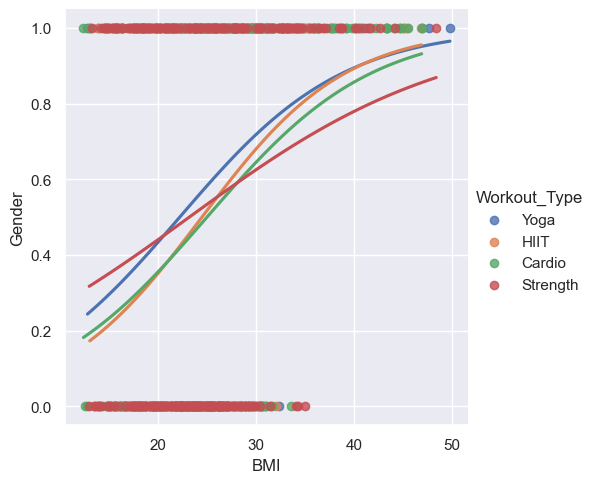

In [30]:
sns.lmplot(x = "BMI", y = "Gender", hue = "Workout_Type", data = df, logistic = True, ci = False)

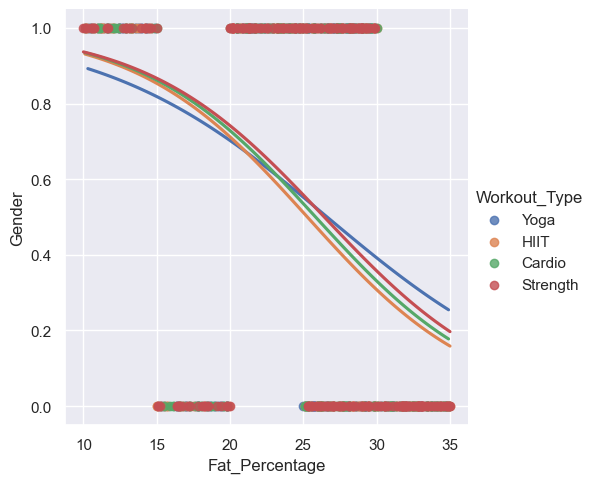

In [31]:
sns.lmplot(x = "Fat_Percentage", y = "Gender", hue = "Workout_Type", data = df, logistic = True, ci = False)

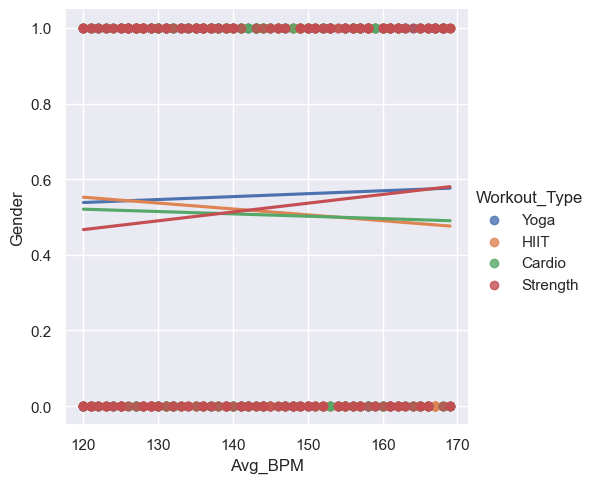

In [32]:
sns.lmplot(x = "Avg_BPM", y = "Gender", hue = "Workout_Type", data = df, logistic = True, ci = False)

## 5. Model Data Preprocessing

In this section, I created features matrix and target array, scaled our numerical explanatory variables, and translated our categorical explanatory variable Workout_type into indicator variables.  

In [33]:
X = df.drop(['Gender'], axis = 1)
X.head()

,Age,Workout_Type,BMI,Fat_Percentage,Avg_BPM
0,56,Yoga,30.20,12.6,157
1,46,HIIT,32.00,33.9,151
2,32,Cardio,24.71,33.4,122
3,25,Strength,18.41,28.8,164
4,38,Strength,14.39,29.2,158


In [34]:
y = df['Gender']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Gender, dtype: int64

In [35]:
X_data_types = X.dtypes
X_data_types

Age                 int64
Workout_Type       object
BMI               float64
Fat_Percentage    float64
Avg_BPM             int64
dtype: object

In [36]:
X_num = df[["Age","BMI","Fat_Percentage","Avg_BPM"]]
X_num.head()

,Age,BMI,Fat_Percentage,Avg_BPM
0,56,30.20,12.6,157
1,46,32.00,33.9,151
2,32,24.71,33.4,122
3,25,18.41,28.8,164
4,38,14.39,29.2,158


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled_df.head()

,Age,BMI,Fat_Percentage,Avg_BPM
0,1.422343,0.794278,-1.978321,0.922970
1,0.600965,1.064652,1.426301,0.504494
2,-0.548964,-0.030361,1.346380,-1.518142
3,-1.123928,-0.976669,0.611110,1.411193
4,-0.056137,-1.580503,0.675047,0.992716


In [38]:
X_cat = df[["Workout_Type"]]
X_cat.head()

,Workout_Type
0,Yoga
1,HIIT
2,Cardio
3,Strength
4,Strength


In [41]:
X_dummies

,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,0,0,1
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
968,0,1,0
969,0,1,0
970,0,0,0
971,1,0,0


In [42]:
X_dummies = pd.get_dummies(X_cat, drop_first = True, dtype = int)
X_scaled=pd.concat([X_scaled_df,X_dummies], axis = 1)
X_scaled

,Age,BMI,Fat_Percentage,Avg_BPM,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.422343,0.794278,-1.978321,0.922970,0,0,1
1,0.600965,1.064652,1.426301,0.504494,1,0,0
2,-0.548964,-0.030361,1.346380,-1.518142,0,0,0
3,-1.123928,-0.976669,0.611110,1.411193,0,1,0
4,-0.056137,-1.580503,0.675047,0.992716,0,1,0
...,...,...,...,...,...,...,...
968,-1.206066,0.579482,-2.393908,0.992716,0,1,0
969,-1.123928,0.116842,0.003713,1.550685,0,1,0
970,1.668756,-0.812942,-0.987304,-1.657634,0,0,0
971,-0.548964,1.926843,0.515205,0.155764,1,0,0


## 6. Feature Selection with k-Fold Cross-Validation

For this project, I choose to use backward elimination algorithm to select the logistic regression model, which in this case, is the model that has the highest average test AUC. We did K-Fold cross validation for each model so that we can get a more robust estimate. 

In [43]:
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression()


In [44]:
from sklearn.model_selection import KFold
cross_val = KFold(n_splits = 5, shuffle =True, random_state = 207)

In [45]:
X_scaled

,Age,BMI,Fat_Percentage,Avg_BPM,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.422343,0.794278,-1.978321,0.922970,0,0,1
1,0.600965,1.064652,1.426301,0.504494,1,0,0
2,-0.548964,-0.030361,1.346380,-1.518142,0,0,0
3,-1.123928,-0.976669,0.611110,1.411193,0,1,0
4,-0.056137,-1.580503,0.675047,0.992716,0,1,0
...,...,...,...,...,...,...,...
968,-1.206066,0.579482,-2.393908,0.992716,0,1,0
969,-1.123928,0.116842,0.003713,1.550685,0,1,0
970,1.668756,-0.812942,-0.987304,-1.657634,0,0,0
971,-0.548964,1.926843,0.515205,0.155764,1,0,0


In [46]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, X_scaled, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.73361823 0.78557895 0.74852632 0.80223285 0.82530569]
Mean Test Fold AUC Score: 0.7790524080208291
Std Test Fold AUC Score: 0.03380946995740572


In [47]:
df_reduce_age = X_scaled[["BMI","Fat_Percentage","Avg_BPM","Workout_Type_HIIT","Workout_Type_Strength","Workout_Type_Yoga"]]
df_reduce_age.head()

,BMI,Fat_Percentage,Avg_BPM,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,0.794278,-1.978321,0.922970,0,0,1
1,1.064652,1.426301,0.504494,1,0,0
2,-0.030361,1.346380,-1.518142,0,0,0
3,-0.976669,0.611110,1.411193,0,1,0
4,-1.580503,0.675047,0.992716,0,1,0


In [48]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce_age, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.73887793 0.78705263 0.74905263 0.79978735 0.82530569]
Mean Test Fold AUC Score: 0.7800152459925739
Std Test Fold AUC Score: 0.03207069416265184


In [49]:
df_reduce_BMI = X_scaled[["Age","Fat_Percentage","Avg_BPM","Workout_Type_HIIT","Workout_Type_Strength","Workout_Type_Yoga"]]
df_reduce_BMI.head()

,Age,Fat_Percentage,Avg_BPM,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.422343,-1.978321,0.922970,0,0,1
1,0.600965,1.426301,0.504494,1,0,0
2,-0.548964,1.346380,-1.518142,0,0,0
3,-1.123928,0.611110,1.411193,0,1,0
4,-0.056137,0.675047,0.992716,0,1,0


In [50]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce_BMI, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.70731975 0.78610526 0.72978947 0.76087188 0.78777246]
Mean Test Fold AUC Score: 0.7543717641482824
Std Test Fold AUC Score: 0.031569144554867465


In [51]:
df_reduce_fat = X_scaled[["Age","BMI","Avg_BPM","Workout_Type_HIIT","Workout_Type_Strength","Workout_Type_Yoga"]]
df_reduce_fat.head()

,Age,BMI,Avg_BPM,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.422343,0.794278,0.922970,0,0,1
1,0.600965,1.064652,0.504494,1,0,0
2,-0.548964,-0.030361,-1.518142,0,0,0
3,-1.123928,-0.976669,1.411193,0,1,0
4,-0.056137,-1.580503,0.992716,0,1,0


In [52]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce_fat, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.67280298 0.60694737 0.63726316 0.70419989 0.67410952]
Mean Test Fold AUC Score: 0.6590645833398869
Std Test Fold AUC Score: 0.03359701189946676


In [53]:
df_reduce_BPM = X_scaled[["Age","BMI","Fat_Percentage","Workout_Type_HIIT","Workout_Type_Strength","Workout_Type_Yoga"]]
df_reduce_BPM.head()

,Age,BMI,Fat_Percentage,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.422343,0.794278,-1.978321,0,0,1
1,0.600965,1.064652,1.426301,1,0,0
2,-0.548964,-0.030361,1.346380,0,0,0
3,-1.123928,-0.976669,0.611110,0,1,0
4,-0.056137,-1.580503,0.675047,0,1,0


In [54]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce_BPM, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.73602893 0.78557895 0.74905263 0.80265816 0.82594365]
Mean Test Fold AUC Score: 0.779852462966633
Std Test Fold AUC Score: 0.03330591993094467


In [55]:
df_reduce_workout = X_scaled[["Age","BMI","Fat_Percentage","Avg_BPM"]]
df_reduce_workout.head()

,Age,BMI,Fat_Percentage,Avg_BPM
0,1.422343,0.794278,-1.978321,0.922970
1,0.600965,1.064652,1.426301,0.504494
2,-0.548964,-0.030361,1.346380,-1.518142
3,-1.123928,-0.976669,0.611110,1.411193
4,-0.056137,-1.580503,0.675047,0.992716


In [56]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce_workout, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.73383739 0.78157895 0.74894737 0.80489102 0.83434343]
Mean Test Fold AUC Score: 0.7807196306467562
Std Test Fold AUC Score: 0.036518291148562664


In [57]:
df_reduce = X_scaled[["BMI","Fat_Percentage","Avg_BPM"]]
df_reduce.head()

,BMI,Fat_Percentage,Avg_BPM
0,0.794278,-1.978321,0.922970
1,1.064652,1.426301,0.504494
2,-0.030361,1.346380,-1.518142
3,-0.976669,0.611110,1.411193
4,-1.580503,0.675047,0.992716


In [58]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.74030243 0.784      0.74726316 0.80350877 0.83572568]
Mean Test Fold AUC Score: 0.7821600080531255
Std Test Fold AUC Score: 0.03549164138530958


In [59]:
df_reduce = X_scaled[["Age","Fat_Percentage","Avg_BPM"]]
df_reduce.head()

,Age,Fat_Percentage,Avg_BPM
0,1.422343,-1.978321,0.922970
1,0.600965,1.426301,0.504494
2,-0.548964,1.346380,-1.518142
3,-1.123928,0.611110,1.411193
4,-0.056137,0.675047,0.992716


In [60]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.70600482 0.78778947 0.72442105 0.76831473 0.79564062]
Mean Test Fold AUC Score: 0.7564341381215876
Std Test Fold AUC Score: 0.03529704529336908


In [61]:
df_reduce = X_scaled[["Age","BMI","Avg_BPM"]]
df_reduce.head()

,Age,BMI,Avg_BPM
0,1.422343,0.794278,0.922970
1,0.600965,1.064652,0.504494
2,-0.548964,-0.030361,-1.518142
3,-1.123928,-0.976669,1.411193
4,-0.056137,-1.580503,0.992716


In [62]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.68025422 0.59589474 0.63178947 0.70207337 0.6877193 ]
Mean Test Fold AUC Score: 0.6595462185437894
Std Test Fold AUC Score: 0.03963092202915498


In [63]:
df_reduce = X_scaled[["Age","BMI","Fat_Percentage"]]
df_reduce.head()

,Age,BMI,Fat_Percentage
0,1.422343,0.794278,-1.978321
1,0.600965,1.064652,1.426301
2,-0.548964,-0.030361,1.346380
3,-1.123928,-0.976669,0.611110
4,-0.056137,-1.580503,0.675047


In [64]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.73657681 0.78178947 0.75063158 0.80637959 0.83487507]
Mean Test Fold AUC Score: 0.7820505035824874
Std Test Fold AUC Score: 0.03588150529913685


In [65]:
df_reduce = X_scaled[["Fat_Percentage","Avg_BPM"]]
df_reduce.head()

,Fat_Percentage,Avg_BPM
0,-1.978321,0.922970
1,1.426301,0.504494
2,1.346380,-1.518142
3,0.611110,1.411193
4,0.675047,0.992716


In [66]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.71197677 0.78742105 0.72442105 0.7661882  0.79925572]
Mean Test Fold AUC Score: 0.7578525575489138
Std Test Fold AUC Score: 0.03429359615029099


In [67]:
df_reduce = X_scaled[["BMI","Avg_BPM"]]
df_reduce.head()

,BMI,Avg_BPM
0,0.794278,0.922970
1,1.064652,0.504494
2,-0.030361,-1.518142
3,-0.976669,1.411193
4,-1.580503,0.992716


In [68]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.68611659 0.60105263 0.63147368 0.69877725 0.68346624]
Mean Test Fold AUC Score: 0.6601772786517724
Std Test Fold AUC Score: 0.03748279971192566


In [69]:
df_reduce_best = X_scaled[["BMI","Fat_Percentage"]]
df_reduce_best.head()

,BMI,Fat_Percentage
0,0.794278,-1.978321
1,1.064652,1.426301
2,-0.030361,1.346380
3,-0.976669,0.611110
4,-1.580503,0.675047


In [70]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce_best, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.74095989 0.78357895 0.74957895 0.80414673 0.83476874]
Mean Test Fold AUC Score: 0.7826066520074618
Std Test Fold AUC Score: 0.034673002247585065


In [71]:
df_reduce = X_scaled[["Fat_Percentage"]]
df_reduce.head()

,Fat_Percentage
0,-1.978321
1,1.426301
2,1.346380
3,0.611110
4,0.675047


In [72]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.71668858 0.78768421 0.72352632 0.76687932 0.80106326]
Mean Test Fold AUC Score: 0.7591683384242088
Std Test Fold AUC Score: 0.03377182990520719


In [73]:
df_reduce = X_scaled[["BMI"]]
df_reduce.head()

,BMI
0,0.794278
1,1.064652
2,-0.030361
3,-0.976669
4,-1.580503


In [74]:
from sklearn.model_selection import cross_val_score
test_fold_auc = cross_val_score(log_mod, df_reduce, y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores', test_fold_auc)
full_mod_test_auc_mean = test_fold_auc.mean()
print('Mean Test Fold AUC Score:', full_mod_test_auc_mean)
full_mod_test_auc_std = test_fold_auc.std()
print('Std Test Fold AUC Score:', full_mod_test_auc_std)

Test Fold AUC Scores [0.68765067 0.60184211 0.63268421 0.70154173 0.68580542]
Mean Test Fold AUC Score: 0.6619048279955162
Std Test Fold AUC Score: 0.03812229300313485


The best model is the one with BMI and fat_percentage

## 7. Best Model Discussion

After getting the best model, I performed a train test split to the dataset, and fitted with our best model. 

In [75]:
df_new = pd.concat([X_scaled, y], axis = 1)
df_new.head()


,Age,BMI,Fat_Percentage,Avg_BPM,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Gender
0,1.422343,0.794278,-1.978321,0.922970,0,0,1,1
1,0.600965,1.064652,1.426301,0.504494,1,0,0,0
2,-0.548964,-0.030361,1.346380,-1.518142,0,0,0,0
3,-1.123928,-0.976669,0.611110,1.411193,0,1,0,1
4,-0.056137,-1.580503,0.675047,0.992716,0,1,0,1


In [76]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_new, test_size= 0.2, random_state=1111)
df_train.head()

,Age,BMI,Fat_Percentage,Avg_BPM,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Gender
833,1.668756,2.906196,0.722999,0.365002,0,1,0,1
334,0.436689,-1.712685,0.051665,1.062463,0,1,0,0
806,1.093791,2.384976,0.371348,0.295256,0,0,0,1
933,0.683103,0.343656,-0.331954,0.295256,1,0,0,1
421,-0.795377,-0.646212,-1.658638,0.086018,0,1,0,1


In [77]:
from sklearn.linear_model import LogisticRegression
X_mod = df_train[['BMI', 'Fat_Percentage']]
y_mod = df_train['Gender']
log_mod = LogisticRegression()
log_mod.fit(X_mod, y_mod)
print("Coefficients:", log_mod.coef_)
print("Intercept:", log_mod.intercept_)

Coefficients: [[ 0.70374755 -0.85311242]]
Intercept: [0.17400017]


### Equations: 

$ \begin{equation} \hat {p} = \frac {1} {1+e^{-\left(0.17400017 - 0.70374755 \times \text{BMI} - 0.85311242 \times \text{Fat\_Percentage}  \right)}} \end{equation} $

$ \begin{equation} \hat {odds} = e^{\left(0.17400017 - 0.70374755 \times \text{BMI} - 0.85311242 \times \text{Fat\_Percentage} \right)} \end{equation} $

$ \begin{equation} log \hat {(odds)} = 0.17400017 - 0.70374755 \times \text{BMI} - 0.85311242 \times \text{Fat\_Percentage} \end{equation} $

### Multicollinearity: 
I check for multicollinearity and can tell that is no multicollinearity probelem between the remaining explanatory variables since all the correlations are smaller than 0.7. 

In [78]:
X_scaled[['BMI','Fat_Percentage']].corr()

,BMI,Fat_Percentage
BMI,1.000000,-0.119258
Fat_Percentage,-0.119258,1.000000


### Slope Interpretation: 
We are able to interpret the magintudes of the slopes since we used the sclaed explanatory variables, and there is no multicollinarity problems. Fat_Percentage is more important since it has a larger absolut number for the slope. 

### Overfitting: 
The best model suggest that when adding age, Avg_BPM, Workout_Type_HIIT, Workout_Type_Strength, Workout_Type_Yoga, the average AUC decreased, suggesting these variables are overfitting. Looking at the relationship between these variables and the response variable from the visuals done previously, I can see that AVG_BPM with Gender has very little association. When looking at the relationship of Workout_Type and Gender we can see that Yoga, HIIT, and Strength have a slight association, but not a very strong one where it could improve the predictive power. Since there was no multicollinearity, none of these variables had a strong association with any other explanatory variables. Also by looking at the graphs we can see that our categorical variable, Workout_Type did not have a strong association with any other variables. 


### Test ROC and AUC: 

Optimization terminated successfully.
         Current function value: 0.568843
         Iterations 6


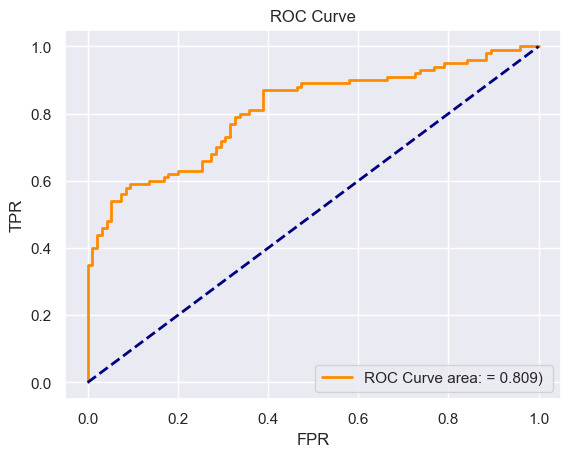

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_roc(fprs, tprs, auc, lw = 2):
    plt.plot(fprs,tprs, color = "darkorange", lw = lw, label = "ROC Curve area: = " + str(round(auc, 3)) + ") ")
    plt.plot([0, 1], [0, 1], color = "navy", lw = lw, linestyle = "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend(loc = "lower right")
    plt.show()
    
res_var = "Gender"
exp_var = ["BMI", "Fat_Percentage"]
formula = res_var + " ~ " + " + ".join(exp_var)
final_model = smf.logit(formula = formula, data = df_train).fit()
df_test["pred_prob_final"] = final_model.predict(df_test)
fprs, tprs, thresholds = roc_curve(y_true = df_test["Gender"], y_score = df_test["pred_prob_final"])
auc = roc_auc_score(y_true = df_test["Gender"], y_score = df_test["pred_prob_final"])
plot_roc(fprs, tprs, auc)

The AUC score of the ROC is 0.809

Since the test AUC score is 0.809, which is relatively high, it means my model does a good job distinguishing between male and females. When looking at the graph, I want the TPR to be as close to 1 as possible, which is not super close, but based on the AUC score, we can still say this model does a relatively good job at distinguishing our response variable.


### Best Predictive Probability threshold: 
At a predictive probability threshold of 0.5, the model correctly identifies 73% of the actual positive cases (True Positive Rate), meaning it successfully classifies 73% of the males. However, it also incorrectly classifies 30.5% of the negative cases as positive (False Positive Rate), meaning that about 1 in 3 females are misclassified.


In [85]:
df_train

,Age,BMI,Fat_Percentage,Avg_BPM,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Gender
833,1.668756,2.906196,0.722999,0.365002,0,1,0,1
334,0.436689,-1.712685,0.051665,1.062463,0,1,0,0
806,1.093791,2.384976,0.371348,0.295256,0,0,0,1
933,0.683103,0.343656,-0.331954,0.295256,1,0,0,1
421,-0.795377,-0.646212,-1.658638,0.086018,0,1,0,1
...,...,...,...,...,...,...,...,...
396,-0.795377,1.220868,-1.770527,-1.518142,0,1,0,1
337,0.354552,-0.631191,0.707015,-0.123220,0,0,0,1
741,1.011654,0.908436,0.978745,1.690177,0,0,0,0
311,1.586618,1.638445,-0.459827,1.690177,1,0,0,1


In [97]:
log_mod = smf.logit(formula = formula, data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.560470
         Iterations 6


In [99]:
df_test["predictive_prob"] = log_mod.predict(df_test)
df_test[["predictive_prob","Gender"]].head()


,predictive_prob,Gender
103,0.688108,1
831,0.948865,1
442,0.831968,1
548,0.382358,0
522,0.244896,0


In [101]:
from sklearn.metrics import confusion_matrix
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred=yhat).ravel()
    tpr = tp/(fn+tp)
    fpr = fp/ (fp+tn)
    return pd.DataFrame({'threshold':[thresh], 'fpr':[fpr], 'tpr':[tpr]})
fpr_tpr_thresh(df_test['Gender'], df_test [ 'predictive_prob'], 0.5)



,threshold,fpr,tpr
0,0.5,0.305263,0.73


## 8. Additional Analysis/Insight

For my additional analysis we created another ROC curve, including our other explanatory variables. It gave a lower AUC score, with the upper right corner of the graph being slightly further away from one, meaning the TPR was lower, which is what I do not want. This helped us pursue our research goal to see which explanatory variables bring the most predictive power to our response variable gender because it validates that I chose the correct model previously. With a lower AUC score and the ROC curve slightly further away from 1 on the y axis, it provides more information that including the other explanatory variables will not improve our model.


In [102]:
df_add = pd.concat([X_scaled_df, X_cat, y], axis=1)
df_train, df_test = train_test_split(df_add, test_size= 0.2, random_state=1111)



Optimization terminated successfully.
         Current function value: 0.560470
         Iterations 6


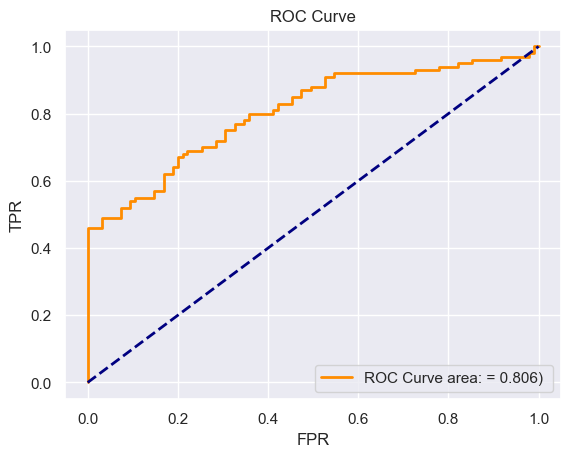

In [103]:
res_var = "Gender"
exp_var = ["Age","BMI","Fat_Percentage", "Avg_BPM", "Workout_Type"]
formula = res_var + " ~ " + " + ".join(exp_var)
formula += " + Age * Workout_Type"
formula += " + BMI * Workout_Type"
formula += " + Avg_BPM * Workout_Type"
int_model = smf.logit(formula = formula, data = df_train).fit()
int_model.summary()
df_test["pred_prob_int"] = int_model.predict(df_test)
fprs, tprs, thresholds = roc_curve(y_true = df_test["Gender"], y_score = df_test["pred_prob_int"])
auc = roc_auc_score(y_true = df_test["Gender"], y_score = df_test["pred_prob_int"])
plot_roc(fprs, tprs, auc)

## 9. Conclusion

* In conclusion, I would suggest this model to personal trainers and gym owners because our average test AUC score was 0.809, which is relatively high, which means my model was pretty accurate at predicting Gender with BMI and Fat Percentage. I had a decently high true positive rate (TPR) meaning our data and predictions were accurate when it came to predicting gender from our final two explanatory variables. Adding on, I can not be 100% certain that our model yields the highest average test AUC score. While the logistic regression model with interaction terms improved the AUC, it's just one of many modeling strategies. There could be other models that perform better on this dataset. 
* Some other techniques that I could use could be a forward selection with cross validation or a regularization with cross validation. By testing these other techniques I can compare average test AUC scores to see which model is a better fit. Additionally, some shortcomings that could have an impact on this model could be overfitting, which I discussed previously. Other shortcomings could be a limited feature set in that it does not include all variables that could lead to an impact on predicting gender. More so, another shortcoming could be that we can not prove that this model predicts the highest possible average test AUC score and there could be other models that are better for predicting the model. Lastly, some improvements I could do for future work would be to test the other techniques for predicting the gender with these variables. We could also include more variables from this dataset to see if those explanatory variables have an impact on our response variable, Gender. 


## References

Byrne, C. (2023, November 21). 6 Factors That Can Affect How Many Calories You Burn. EverydayHealth.com. https://www.everydayhealth.com/fitness/factors-that-can-affect-how-many-calories-you-burn/


Segar, M., Jayaratne, T., Hanlon, J., & Richardson, C. R. (2002). Fitting fitness into women’s lives: effects of a gender-tailored physical activity intervention. Women’s Health Issues, 12(6), 338–347. https://doi.org/10.1016/s1049-3867(02)00156-1
